<font size = 5>**LAB 10**</font>

<font size = 4>**QUESTION 1**</font>

1) Implement the generalized equation for finding the gradient of m-samples, each having n-features. Also, implement the gradient descent approach assuming a constant learning rate.

In [153]:
import numpy as np
import pandas as pd

def loss(w,x,y):
    #x shape is n rows features , m samples (cols)
    #y has shape (1,m)
    m = x.shape[1]
    #w should have m weights
    predicted = w@x 
    return np.sum((y - predicted)**2)/(2*m)
    
    
def gradient(w,x,y):
    n = x.shape[0]
    m = x.shape[1]
    predicted = w@x
    
    #Now we find the gradient, array of m+1 elements , each corresponding to each weight
    
    return (x@(predicted.T - y.T)).T/m
    
class lin_reg:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def gradient_descent(self,num_iter,alpha):
        losses = []
        n = self.x.shape[0]
        m = self.x.shape[1] 
        w = np.random.rand(1,n) #initially set random weights 
        for i in range(0,num_iter):
            losses.append(loss(w,self.x,self.y))
            grad = gradient(w,self.x,self.y)
            w = w - grad*alpha
        return w,losses
    


<font size = 4>**QUESTION 2**</font>

2) Using the code developed for problem 1, do the linear regression for the univariate problem using the attached data file univariate_linear_regression.csv. Plot the cost function (both as surface as well as contour) as well as the best fit line. 

In [154]:
df = pd.read_csv("univariate_linear_regression.csv")

#Creating the feature / sample data
x = np.array(df["x"])
#We add feature of x0(i) = 1 so support bias term embedded into the weight array
ones = np.ones(x.shape[0]) #Sir mentionned this in class while teaching , this way we can incorporate 
# the bias term as w[0] term of weight

x = x.reshape(x.shape+(1,)).transpose()
x = np.concatenate(([ones],x),axis = 0)

y = np.array(df["y"]).reshape((1,200))


In [155]:

#Gradient descent done below
model = lin_reg(x,y)
weights , losses = model.gradient_descent(1000,0.01)


[[-10.06464471   2.97261398]]


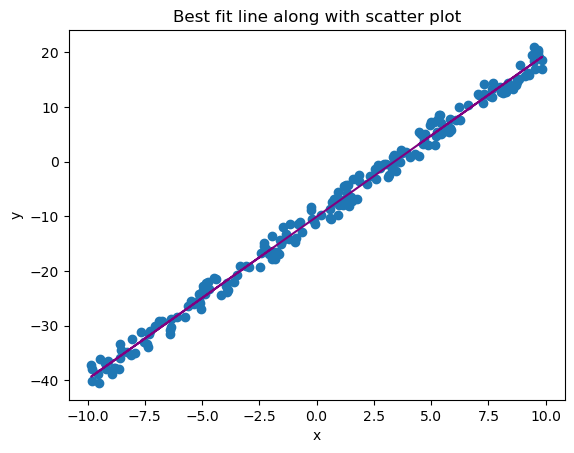

In [156]:
#Best fit line with scatter plot of x vs y 
import matplotlib.pyplot as plt

predicted = weights@x
print(weights)
linex = x[1].reshape((200,))
plt.scatter(x[1].reshape((1,200)),y)
plt.plot(linex,predicted.reshape(200,),color = "purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Best fit line along with scatter plot")
plt.show()

Text(0.5, 0, 'loss')

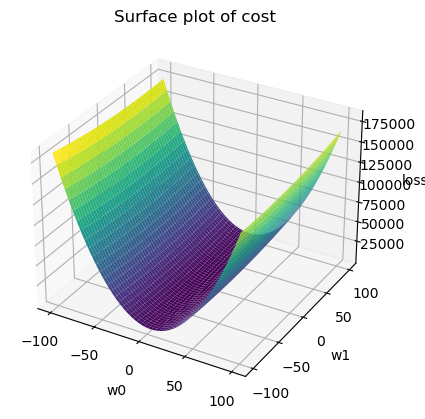

In [157]:
#Surface plot of the cost

w1 = np.linspace(-100,100,100)
w2 = np.linspace(-100,100,100)
W1,W2 = np.meshgrid(w1,w2)
costs = np.zeros(10000).reshape((100,100))

for i in range(100):
    for j in range(100):
        costs[i][j] = loss(np.array([[w1[i],w2[j]]]),x,y)
        
fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
cp = ax.plot_surface(W1,W2,costs,cmap = "viridis")
ax.set_title("Surface plot of cost")
ax.set_xlabel("w0")
ax.set_ylabel("w1")
ax.set_zlabel("loss")

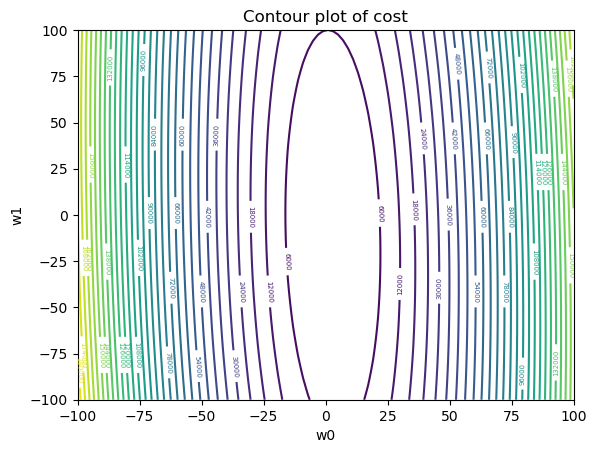

In [158]:
#Contour plot of cost
#RUN above cell before running this cell

cp = plt.contour(W1,W2,costs,levels = 30)
plt.clabel(cp,fontsize = 5)
plt.title("Contour plot of cost")
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

Text(0, 0.5, 'Loss')

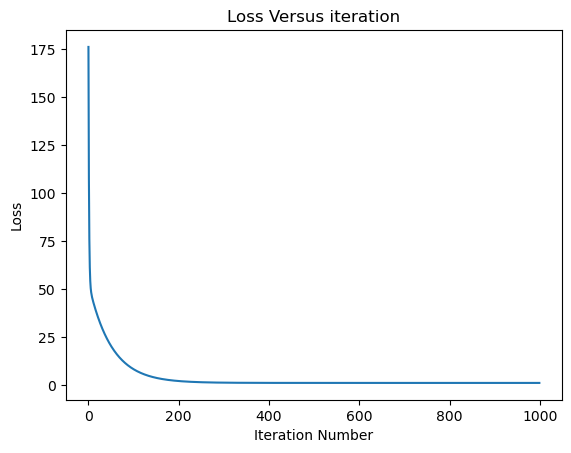

In [159]:
#Loss with iteration

plt.plot(losses)
plt.title("Loss Versus iteration")
plt.xlabel("Iteration Number")
plt.ylabel("Loss")

<font size = 4>**QUESTION 3**</font>

3) Using the code developed for problem 1, do the linear regression for the multivariate problem using the attached data file heart.data.csv. Plot the best fit plane for the given data. Can you also interpret the result (taking one independent variable at a time)?

In [160]:
'''
Run the following cells in order for proper results
'''

df = pd.read_csv("heart.data.csv")
df = df.drop(columns = df.columns[0])

#y is target values
y = np.array(df["heart.disease"])
y = y.reshape((1,y.shape[0]))

#x is the sample , feature array . Its shape is set to (features(n),samples(m))
x = np.array(df[["biking","smoking"]])
x = x.T
ones = np.ones(x.shape[1])
x = np.concatenate(([ones],x),axis = 0)

model = lin_reg(x,y)
weights,losses = model.gradient_descent(200000,3e-4)
print(losses[len(losses)-1])


0.2125922155353944


Text(0.5, 0, 'heart disease')

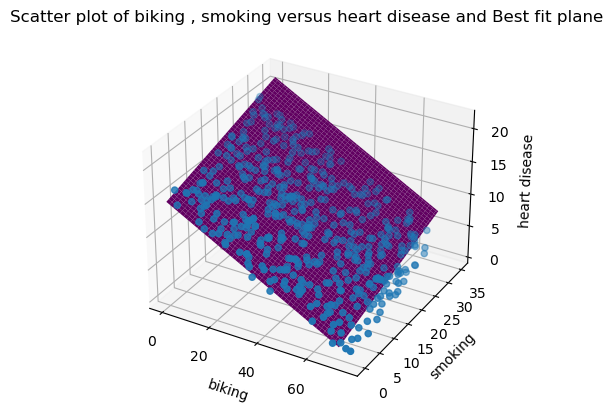

In [146]:
#Scatter plot and best fit plane

feature1 = np.array(df["biking"])
feature2 = np.array(df["smoking"])
target = np.array(df["heart.disease"])

fig = plt.figure()
ax = fig.add_subplot(111,projection = "3d")
ax.scatter(feature1,feature2,target)

x = np.linspace(0,70,100)
y = np.linspace(0,35,100)
X,Y = np.meshgrid(x,y)
Z = np.zeros(10000).reshape((100,100))
for i in range(100):
    for j in range(100):
        Z[i][j] = weights[0][0] + weights[0][1]*X[i][j] + weights[0][2]*Y[i][j]
ax.plot_surface(X,Y,Z,color = "purple")

ax.set_title("Scatter plot of biking , smoking versus heart disease and Best fit plane")
ax.set_xlabel("biking")
ax.set_ylabel("smoking")
ax.set_zlabel("heart disease")



Text(0, 0.5, 'Loss')

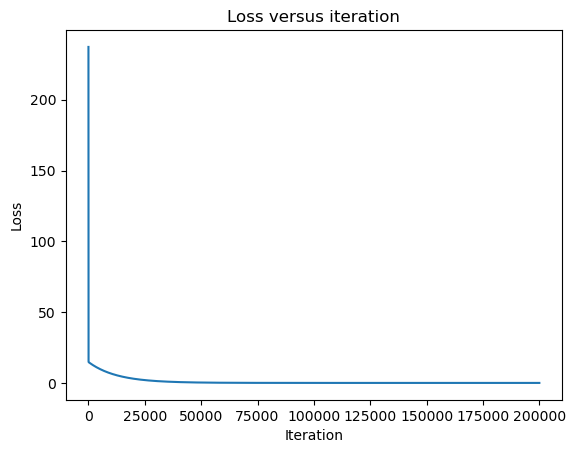

In [162]:

#Loss versus time

plt.plot(losses)
plt.title("Loss versus iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")


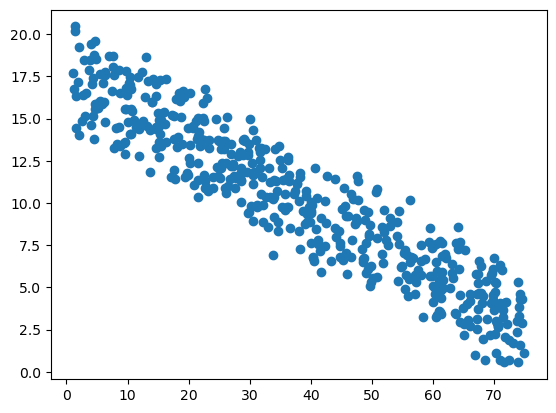

In [150]:

#Scatter plot for biking versus heart disease

x = np.array(df["biking"])
y = np.array(df["heart.disease"])
plt.scatter(x,y)
plt.title("Biking versus Heart Disease")
plt.xlabel("biking")
plt.ylabel("heart disease")

'''As we can see there is a clear NEGATIVE correlation
'''

Text(0, 0.5, 'heart disease')

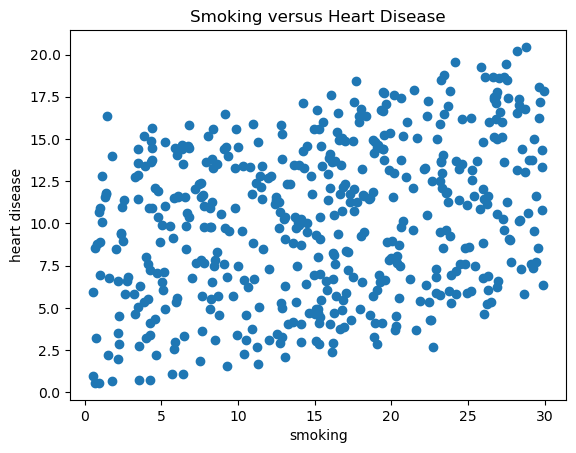

In [151]:

#Scatter plot for smoking versus heart disease

x = np.array(df["smoking"])
y = np.array(df["heart.disease"])
plt.scatter(x,y)
plt.title("Smoking versus Heart Disease")
plt.xlabel("smoking")
plt.ylabel("heart disease")

'''As we can see there is a slight POSITIVE correlation
'''

<font size = 3> Observation : </font>

The first weight of linear regression for question 3 (BIAS - w0) turns out to be positive. (14.97 when I ran it) 

The second weight (w1) came out to be -0.20 which implies that biking generally decreases heart disease.

The third weight (w2) came out to be 0.178 which implies that smoking increase heart disease in general.

In [164]:
print(weights) '''Run this cell after running the gradient descent of question 3 to show its weights'''

[[14.97976385 -0.20008023  0.1784793 ]]
